In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42
)

In [4]:
from sklearn.svm import SVC

In [6]:

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_i, y_train_i)
svm_linear_pred = svm_linear.predict(X_test_i)

svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train_i, y_train_i)
svm_poly_pred = svm_poly.predict(X_test_i)

svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_i, y_train_i)
svm_rbf_pred = svm_rbf.predict(X_test_i)


In [7]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

In [8]:
model_predictions = {
    "Linear SVM": svm_linear_pred,
    "Polynomial SVM (deg=3)": svm_poly_pred,
    "RBF SVM": svm_rbf_pred
}

for model_name, y_pred in model_predictions.items():
    print(f"{model_name} ")
    print("Accuracy :", accuracy_score(y_test_i, y_pred))
    print("Precision:", precision_score(y_test_i, y_pred, average='macro'))
    print("Recall   :", recall_score(y_test_i, y_pred, average='macro'))
    print("F1-Score :", f1_score(y_test_i, y_pred, average='macro'))
    print("\nClassification Report:")
    print(classification_report(y_test_i, y_pred))


Linear SVM 
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-Score : 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Polynomial SVM (deg=3) 
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-Score : 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

RBF SVM 
Accuracy : 1.0
Precision:

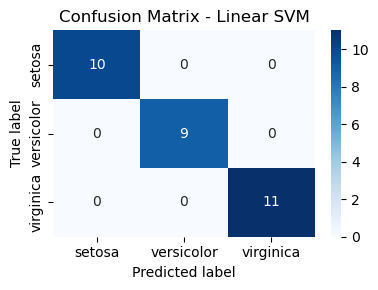

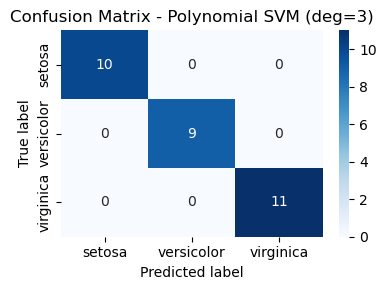

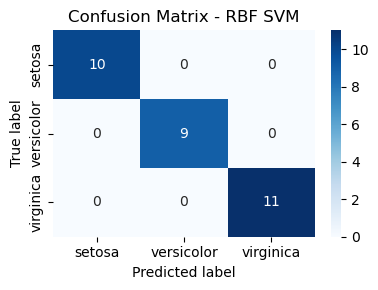

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
model_predictions = {
    "Linear SVM": svm_linear_pred,
    "Polynomial SVM (deg=3)": svm_poly_pred,
    "RBF SVM": svm_rbf_pred
}
classes = iris.target_names

for model_name, preds in model_predictions.items():
    cm = confusion_matrix(y_test_i, preds)

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
                xticklabels=classes, yticklabels=classes)

    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.tight_layout()
    plt.show()

In [10]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [11]:
bc = datasets.load_breast_cancer()
X_bc = bc.data
y_bc = bc.target

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bc, y_bc, test_size=0.2, random_state=42, stratify=y_bc)


In [12]:
svm_noscale = SVC(kernel='rbf', random_state=42)
svm_noscale.fit(X_train_b, y_train_b)

y_train_ns = svm_noscale.predict(X_train_b)
y_test_ns  = svm_noscale.predict(X_test_b)

metrics_ns = {
    'train_accuracy': accuracy_score(y_train_b, y_train_ns),
    'test_accuracy' : accuracy_score(y_test_b, y_test_ns),
    'train_precision': precision_score(y_train_b, y_train_ns),
    'test_precision' : precision_score(y_test_b, y_test_ns),
    'train_recall' : recall_score(y_train_b, y_train_ns),
    'test_recall'  : recall_score(y_test_b, y_test_ns),
    'train_f1'     : f1_score(y_train_b, y_train_ns),
    'test_f1'      : f1_score(y_test_b, y_test_ns)
}

print(classification_report(y_test_b, y_test_ns))


              precision    recall  f1-score   support

           0       0.95      0.86      0.90        42
           1       0.92      0.97      0.95        72

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [13]:
scaler = StandardScaler()
X_train_b_scaled = scaler.fit_transform(X_train_b)
X_test_b_scaled  = scaler.transform(X_test_b)

svm_scaled = SVC(kernel='rbf', random_state=42)
svm_scaled.fit(X_train_b_scaled, y_train_b)

y_train_s = svm_scaled.predict(X_train_b_scaled)
y_test_s  = svm_scaled.predict(X_test_b_scaled)

metrics_s = {
    'train_accuracy': accuracy_score(y_train_b, y_train_s),
    'test_accuracy' : accuracy_score(y_test_b, y_test_s),
    'train_precision': precision_score(y_train_b, y_train_s),
    'test_precision' : precision_score(y_test_b, y_test_s),
    'train_recall' : recall_score(y_train_b, y_train_s),
    'test_recall'  : recall_score(y_test_b, y_test_s),
    'train_f1'     : f1_score(y_train_b, y_train_s),
    'test_f1'      : f1_score(y_test_b, y_test_s)
}

print(classification_report(y_test_b, y_test_s))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

